In [33]:
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import disk
import numpy as np

In [118]:
im1 = cv2.resize(cv2.imread('./Test/Test/ISIC_0000036.jpg',cv2.IMREAD_GRAYSCALE),(512,384))
im2 = cv2.resize(cv2.imread('./Test/Test/ISIC_0009944.jpg',cv2.IMREAD_GRAYSCALE),(512,384))
im3 = cv2.resize(cv2.imread('./Test/Test/ISIC_0011126.jpg',cv2.IMREAD_GRAYSCALE),(512,384))
im4 = cv2.resize(cv2.imread('./Test/Test/ISIC_0012167.jpg',cv2.IMREAD_GRAYSCALE),(512,384))

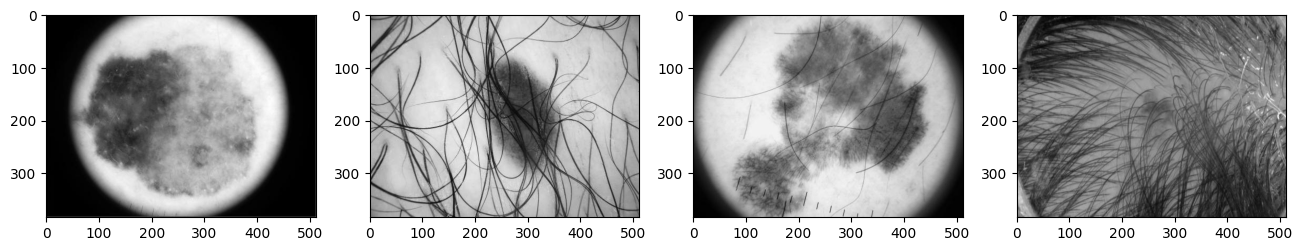

In [119]:
fig,ax = plt.subplots(1,4,figsize=(16,12))
ax.ravel()
ax[0].imshow(im1,cmap='gray')
ax[1].imshow(im2,cmap='gray')
ax[2].imshow(im3,cmap='gray')
ax[3].imshow(im4,cmap='gray')

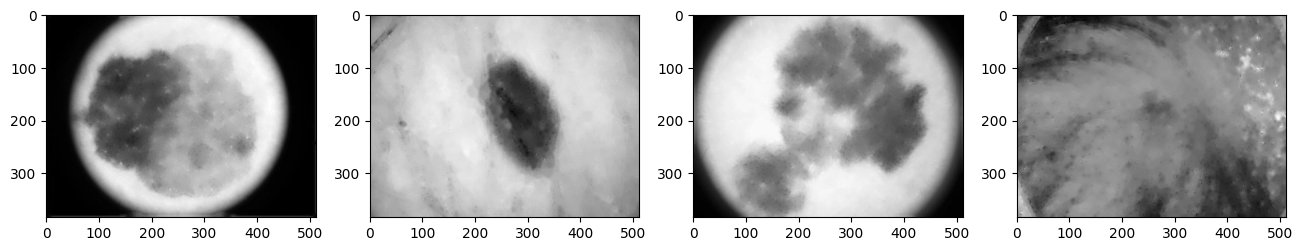

In [121]:
#Dull Razor

kernel = cv2.getStructuringElement(1,(9,9)) 
blackhat1,blackhat2,blackhat3,blackhat4 = cv2.morphologyEx(im1, cv2.MORPH_BLACKHAT, kernel),cv2.morphologyEx(im2, cv2.MORPH_BLACKHAT, kernel),cv2.morphologyEx(im3, cv2.MORPH_BLACKHAT, kernel),cv2.morphologyEx(im4, cv2.MORPH_BLACKHAT, kernel)
#Gaussian filter
bhg1,bhg2,bhg3,bhg4= cv2.GaussianBlur(blackhat1,(3,3),cv2.BORDER_DEFAULT),cv2.GaussianBlur(blackhat2,(3,3),cv2.BORDER_DEFAULT),cv2.GaussianBlur(blackhat3,(3,3),cv2.BORDER_DEFAULT),cv2.GaussianBlur(blackhat4,(3,3),cv2.BORDER_DEFAULT)
#Binary thresholding (MASK)
ret1,mask1 = cv2.threshold(bhg1,1,255,cv2.THRESH_BINARY)
ret2,mask2 = cv2.threshold(bhg2,1,255,cv2.THRESH_BINARY)
ret3,mask3 = cv2.threshold(bhg3,1,255,cv2.THRESH_BINARY)
ret4,mask4 = cv2.threshold(bhg4,1,255,cv2.THRESH_BINARY)

#Replace pixels of the mask
dst1,dst2,dst3,dst4 = cv2.inpaint(im1,mask1,6,cv2.INPAINT_TELEA),cv2.inpaint(im2,mask2,6,cv2.INPAINT_TELEA),cv2.inpaint(im3,mask3,6,cv2.INPAINT_TELEA),cv2.inpaint(im4,mask4,6,cv2.INPAINT_TELEA)

fig,ax = plt.subplots(1,4,figsize=(16,12))
ax.ravel()
ax[0].imshow(dst1,cmap='gray')
ax[1].imshow(dst2,cmap='gray')
ax[2].imshow(dst3,cmap='gray')
ax[3].imshow(dst4,cmap='gray')

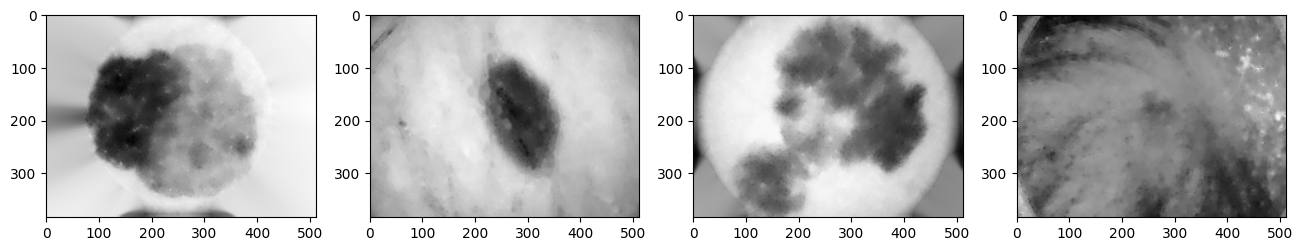

In [122]:
m1,m2,m3,m4 = cv2.dilate((dst1<15).astype(np.uint8),disk(30)),cv2.dilate((dst2<15).astype(np.uint8),disk(30)),cv2.dilate((dst3<15).astype(np.uint8),disk(30)),cv2.dilate((dst4<15).astype(np.uint8),disk(30))
post1,post2,post3,post4 = cv2.inpaint(dst1,m1,6,cv2.INPAINT_TELEA),cv2.inpaint(dst2,m2,6,cv2.INPAINT_TELEA),cv2.inpaint(dst3,m3,6,cv2.INPAINT_TELEA),cv2.inpaint(dst4,m4,6,cv2.INPAINT_TELEA)

fig,ax = plt.subplots(1,4,figsize=(16,12))
ax.ravel()
ax[0].imshow(post1,cmap='gray')
ax[1].imshow(post2,cmap='gray')
ax[2].imshow(post3,cmap='gray')
ax[3].imshow(post4,cmap='gray')

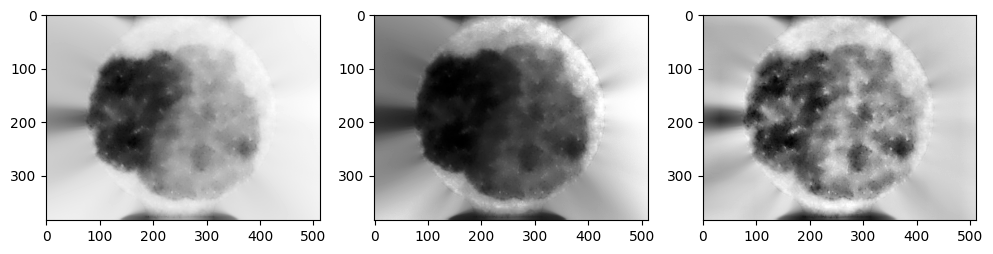

In [130]:
post= post1

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
fim = cv2.equalizeHist(post)
fim2 = clahe.apply(post)

fig,ax = plt.subplots(1,3,figsize=(12,10))
ax.ravel()
ax[0].imshow(post,cmap='gray')
ax[1].imshow(fim,cmap='gray')
ax[2].imshow(fim2,cmap='gray')

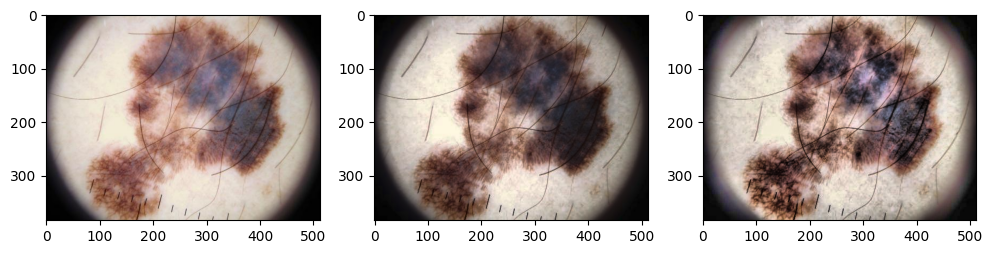

In [76]:
hsv = cv2.cvtColor(im3,cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)


clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
newv = cv2.equalizeHist(v)
newv2 = clahe.apply(v)
fim = cv2.merge((h,s,newv))
fim2 = cv2.cvtColor(cv2.merge((h,s,newv2)),cv2.COLOR_HSV2RGB)
fim = cv2.cvtColor(fim,cv2.COLOR_HSV2RGB)


fig,ax = plt.subplots(1,3,figsize=(12,10))
ax.ravel()
ax[0].imshow(im3)
ax[1].imshow(fim)
ax[2].imshow(fim2)


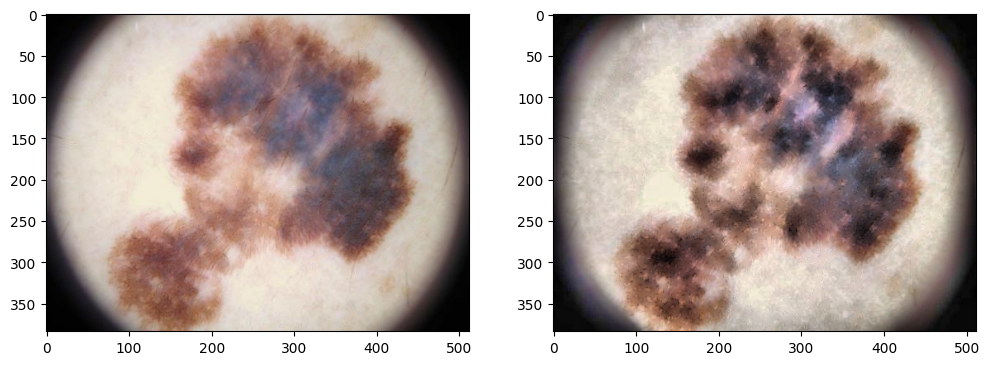

In [78]:
#Gray scale
grayScale = cv2.cvtColor(fim2, cv2.COLOR_RGB2GRAY )
#Black hat filter
kernel = cv2.getStructuringElement(1,(9,9)) 
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
#Gaussian filter
bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
#Binary thresholding (MASK)
ret,mask = cv2.threshold(bhg,10,255,cv2.THRESH_BINARY)
#Replace pixels of the mask
dst = cv2.inpaint(fim2,mask,6,cv2.INPAINT_TELEA)

fig,ax = plt.subplots(1,2,figsize=(12,10))
ax.ravel()
ax[0].imshow(dst3)
ax[1].imshow(dst) 

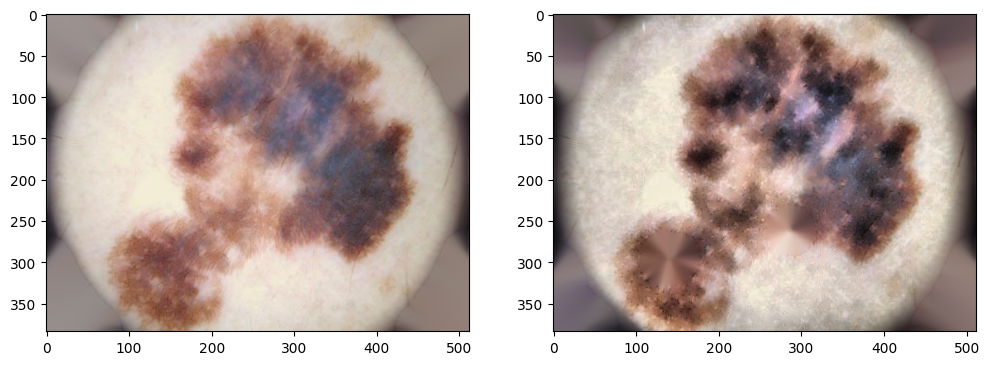

In [79]:
g = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
m = cv2.dilate((g<10).astype(np.uint8),disk(30))
post = cv2.inpaint(dst,m,6,cv2.INPAINT_TELEA)

fig,ax = plt.subplots(1,2,figsize=(12,10))
ax.ravel()
ax[0].imshow(post3)
ax[1].imshow(post) 